In [20]:
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import keras
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential, save_model, load_model
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
import numpy as np
from keras.callbacks import TensorBoard
import time
import matplotlib.pyplot as plt
import datetime
import cv2
import os
import tensorflow as tf
import tensorflow.keras
import cv2
print('tf version', tf.__version__)
print('keras version', tf.keras.__version__)
print('gpu is ','available' if tf.config.list_physical_devices('GPU') else 'not available')

tf version 2.12.0
keras version 2.12.0
gpu is  available


In [13]:
img_width, img_height = 80,80
NAME = 'Model3_CNN_{}'.format(datetime.datetime.now().strftime("%d.%m.%Y-%H_%M"))
train_data_dir = '/content/drive/MyDrive/archive (1)/Train/Train/'
validation_data_dir = '/content/drive/MyDrive/archive (1)/Test/Test/'
eval_data_dir = '/content/drive/MyDrive/archive (1)/Validation/Validation/'


nb_train_samples = 1322
nb_validation_samples = 150
nb_eval_samples = 60 
epochs = 10
batch_size = 128
num_of_class = 3

In [14]:
train_datagen = ImageDataGenerator( #Image Augmentation # Research on other parameters
                rescale = 1. / 255, 
                shear_range = 0.25, 
                zoom_range = 0.25,
                rotation_range=10) 
  
test_datagen = ImageDataGenerator(rescale = 1. / 255) #Image Augmentation
train_generator = train_datagen.flow_from_directory(train_data_dir, 
                                                    target_size =(img_width, img_height), 
                                                    batch_size = batch_size, class_mode ='categorical',color_mode='rgb', #grayscale
                                                    shuffle=False)
validation_generator = test_datagen.flow_from_directory(validation_data_dir, 
                                                        target_size =(img_width, img_height), 
                                                        batch_size = batch_size, class_mode ='categorical',color_mode='rgb', #grayscale
                                                        shuffle=False) 

eval_generator = test_datagen.flow_from_directory(eval_data_dir, 
                                                  target_size =(img_width, img_height), 
                                                  batch_size = batch_size, class_mode ='categorical',color_mode='rgb', #grayscale
                                                  shuffle=False)

Found 1322 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [15]:
print("GPUs Available: ", tf.config.experimental.list_physical_devices('GPU'))

GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


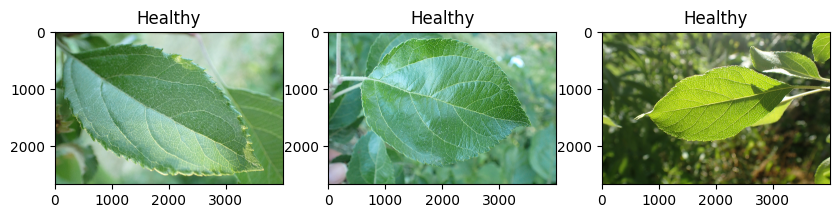

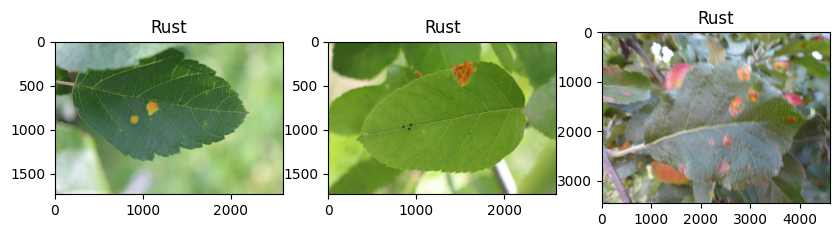

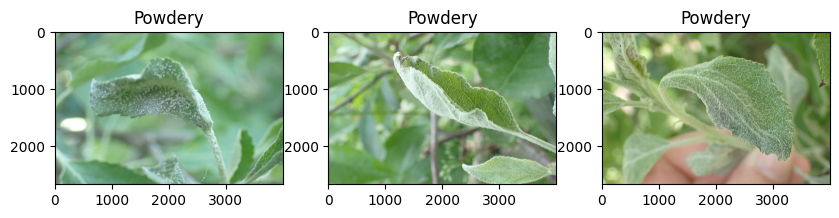

In [16]:
import random

def rescale_and_plot_images(image_files,class_name):
    for idx, img_path in enumerate(image_files):
        plt.subplot(3, 3, idx + 1)
        img = plt.imread(img_path)
        plt.imshow(img, cmap = 'gray')
        plt.title(class_name)

def plot_images(path, class_name):
    image_paths = []
    class_name_path = os.path.join(path, class_name)
    image_paths = [os.path.join(class_name_path, img_png) for img_png in random.sample(os.listdir(class_name_path), 3)]
    
    plt.figure(figsize = (10, 25))
    rescale_and_plot_images(image_paths,class_name)
plot_images(train_data_dir, 'Healthy')
plot_images(train_data_dir, 'Rust')
plot_images(train_data_dir, 'Powdery')

In [17]:
input_shape = (img_width, img_height, 3) 

model3 = Sequential()

model3.add(Conv2D(32, (3,3), input_shape=input_shape, activation='relu',data_format='channels_last'))
model3.add(MaxPooling2D((2,2), strides=(1,1), padding='same'),)

model3.add(Conv2D(64, (3,3), activation='relu'),)
model3.add(MaxPooling2D((2,2), strides=(1,1), padding='same'),)

model3.add(Conv2D(128, (3,3), activation='relu'),)
model3.add(MaxPooling2D((2,2), strides=(1,1), padding='same'),)
# model3.add(Dropout(0.15))
model3.add(Flatten())

model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))

model3.add(Dropout(0.5))
model3.add(Dense(num_of_class, activation='softmax'))

In [18]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 78, 78, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 78, 78, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 76, 76, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 76, 76, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 74, 74, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 128)     

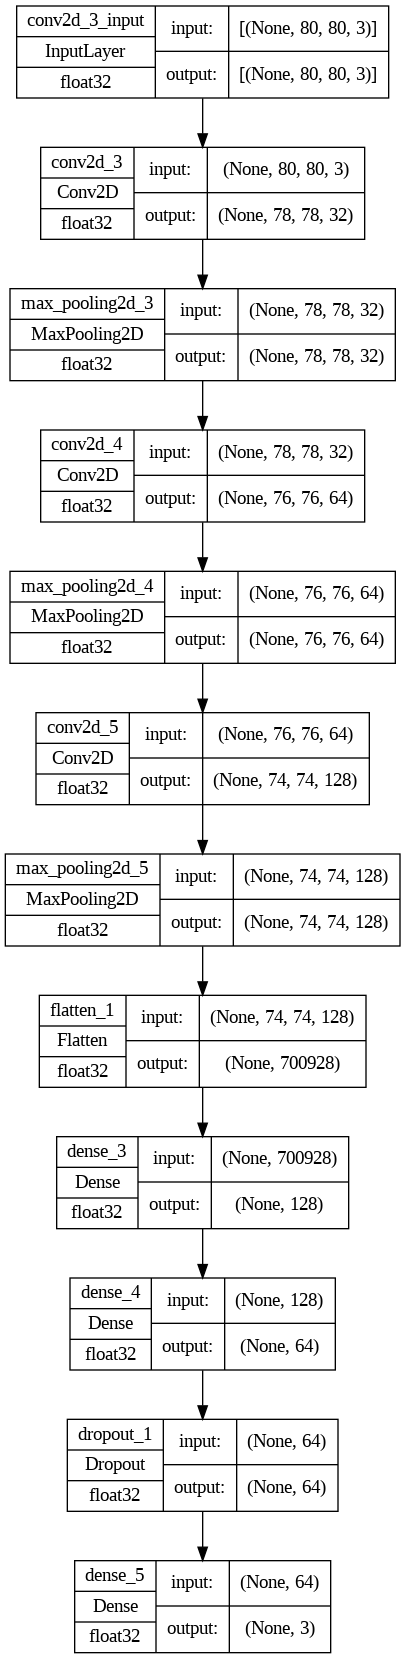

In [19]:
keras.utils.plot_model(
    model3,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [20]:
model3.compile(loss ='categorical_crossentropy',
                     optimizer ='rmsprop', 
                   metrics =['accuracy'])

In [21]:
H = model3.fit_generator(train_generator,
    steps_per_epoch = nb_train_samples // batch_size, 
    epochs = epochs, validation_data = validation_generator, 
    validation_steps = nb_validation_samples // batch_size)

<ipython-input-21-80e164bf8886>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model3.fit_generator(train_generator,


Epoch 1/10
10/10 [==============================] - 218s 22s/step - loss: 12.8460 - accuracy: 0.3342 - val_loss: 1.0893 - val_accuracy: 0.3594
Epoch 2/10
10/10 [==============================] - 205s 21s/step - loss: 1.2771 - accuracy: 0.2580 - val_loss: 1.0981 - val_accuracy: 0.2188
Epoch 3/10
10/10 [==============================] - 212s 21s/step - loss: 1.1011 - accuracy: 0.2672 - val_loss: 1.0956 - val_accuracy: 0.4844
Epoch 4/10
10/10 [==============================] - 205s 21s/step - loss: 1.1060 - accuracy: 0.3132 - val_loss: 1.0975 - val_accuracy: 0.3438
Epoch 5/10
10/10 [==============================] - 205s 21s/step - loss: 1.2254 - accuracy: 0.4497 - val_loss: 1.2468 - val_accuracy: 0.2188
Epoch 6/10
10/10 [==============================] - 198s 20s/step - loss: 2.3816 - accuracy: 0.3543 - val_loss: 1.1018 - val_accuracy: 0.3906
Epoch 7/10
10/10 [==============================] - 206s 21s/step - loss: 1.4849 - accuracy: 0.2797 - val_loss: 1.0522 - val_accuracy: 0.5078
Epoch

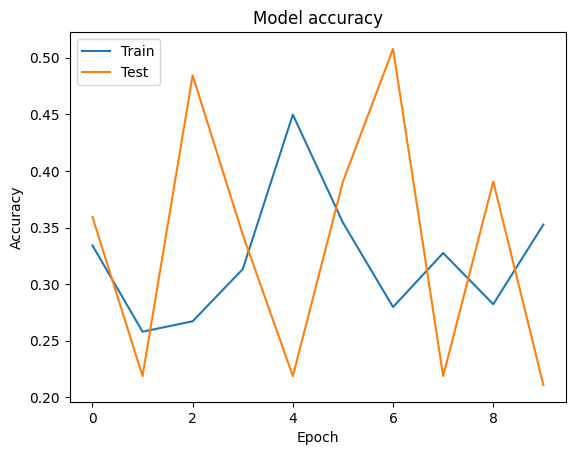

In [22]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
fig, ax = plt.subplots(1,1)
plt.plot(H.history["accuracy"])
plt.plot(H.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


fig.savefig('./'+'model1_train_test_accuracy.jpeg',dpi=93)

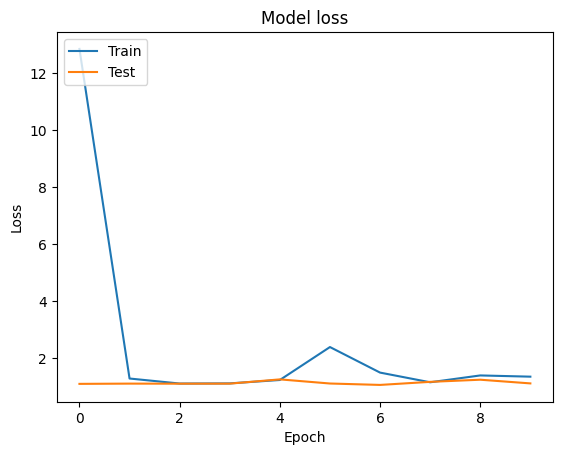

In [23]:
# Plot training & validation loss values
fig, ax = plt.subplots(1,1)
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
fig.savefig('./'+'model1_train_test_los.jpeg',dpi=93)

In [24]:
model3.save('./'+NAME+'.hdf5')

In [25]:
validation_generator.class_indices

{'Healthy': 0, 'Powdery': 1, 'Rust': 2}

<ipython-input-26-de1e903b1a2f>:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model3.predict_generator(eval_generator, nb_eval_samples // batch_size+1)


Classification Report
              precision    recall  f1-score   support

     Healthy       0.00      0.00      0.00        20
     Powdery       0.00      0.00      0.00        20
        Rust       0.33      1.00      0.50        20

    accuracy                           0.33        60
   macro avg       0.11      0.33      0.17        60
weighted avg       0.11      0.33      0.17        60



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


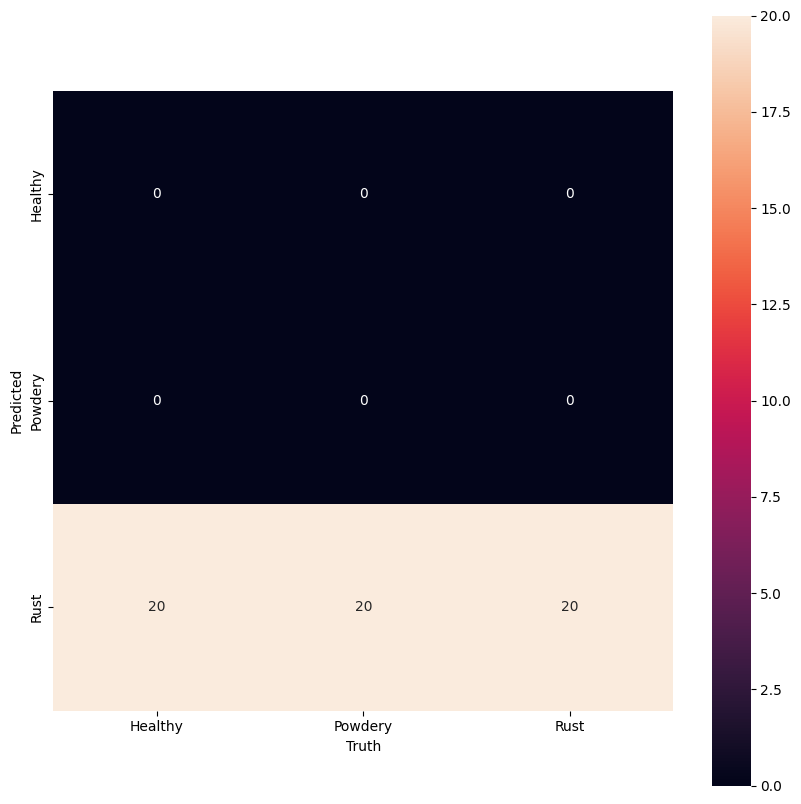

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
target_names=['Healthy','Powdery','Rust']

Y_pred = model3.predict_generator(eval_generator, nb_eval_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)


plt.figure(figsize=(10,10))
cm = confusion_matrix(eval_generator.classes, y_pred)
_=sns.heatmap(cm.T, annot=True, fmt='d', cbar=True, square=True, xticklabels=target_names,
             yticklabels=target_names)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.savefig('./'+'confusion_matrix_onEval.jpeg',dpi=93)

print('Classification Report')
report = classification_report(eval_generator.classes, y_pred, target_names=target_names)
print(report)

<ipython-input-28-98f7eb1e3de4>:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model3.predict_generator(validation_generator, nb_validation_samples // batch_size+1)


Classification Report
              precision    recall  f1-score   support

     Healthy       0.33      0.02      0.04        50
     Powdery       0.00      0.00      0.00        50
        Rust       0.33      0.96      0.49        50

    accuracy                           0.33       150
   macro avg       0.22      0.33      0.18       150
weighted avg       0.22      0.33      0.18       150



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


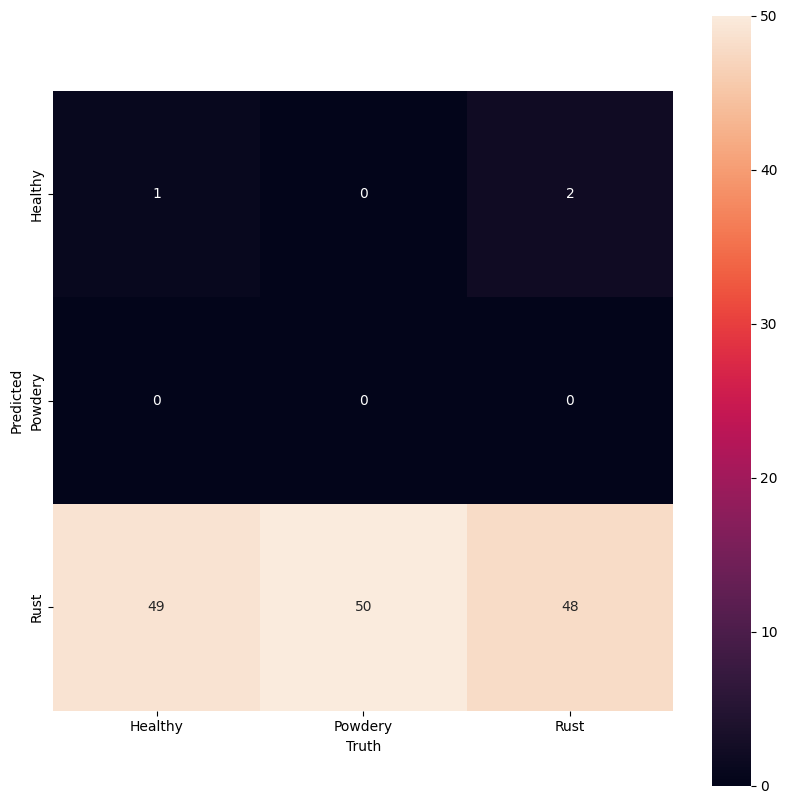

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


Y_pred = model3.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)


plt.figure(figsize=(10,10))
cm = confusion_matrix(validation_generator.classes, y_pred)
_=sns.heatmap(cm.T, annot=True, fmt='d', cbar=True, square=True, xticklabels=target_names,
             yticklabels=target_names)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.savefig('./'+'confusion_matrix_onValidation.jpeg',dpi=93)

print('Classification Report')
report = classification_report(validation_generator.classes, y_pred, target_names=target_names)
print(report)

# New Section

# New Section